## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Leer dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Dividir dataset en rasgos y clases

In [3]:
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


## Escalado de variables

In [5]:
from sklearn.preprocessing import StandardScaler

# --> Objeto para estandarizar
sc_x = StandardScaler()
sc_y = StandardScaler()

# --> Aplicar estandarizacion
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1, 1))


## Ajustar regresion con dataset(crear modelo)

In [11]:
from sklearn.svm import SVR

# --> Crear objeto de regresion
regression = SVR(kernel = "rbf")

# --> Convertir y en un vector
y = np.ravel(y)

# --> Entrenar
regression.fit(x ,y)

SVR()

## Predicción del modelo

In [31]:
y_pred = regression.predict(sc_x.transform([[6.5]]))
print(f"Prediccion con escalado: {y_pred}")

y_pred = sc_y.inverse_transform(regression.predict(sc_x.transform(np.array([[6.5]]))).reshape(-1, 1))
print(f"Prediccion sin escalado: {y_pred}")

Prediccion con escalado: [0.01158103]
Prediccion sin escalado: [[252789.13921624]]


## Graficar resultados

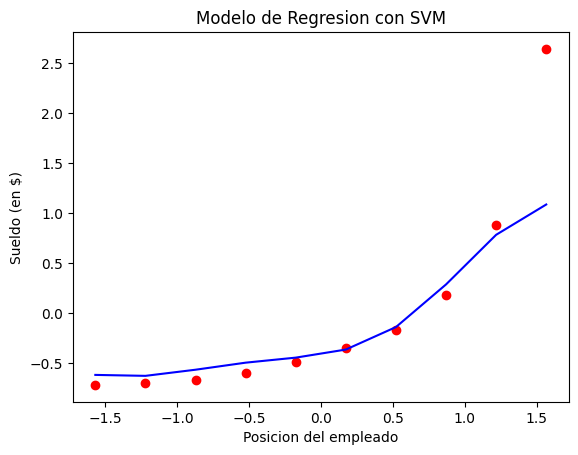

In [13]:
# --> Datos
plt.scatter(x, y, color = "red")
plt.plot(x, regression.predict(x), color = "blue")

# --> Titulos
plt.title("Modelo de Regresion con SVM")
plt.xlabel("Posicion del empleado")
plt.ylabel("Sueldo (en $)")

# --> Mostrar
plt.show()